#### Table of content:

# Introduction

 - This dataset is taken from kaggle and the link is https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.
#### I chose this dataset because its a good starting point to analyze the trends in the variables. It consits of various parameters that are important features to estimate the cost of the house. Ignoring the fact that price of a house is only estimated from the locality it is in, we assume that neighbourhood of each of the houses does not contribute or all houses are in the same neighbourhood. 
#### It contains above 1000 records and 81 columns describing specific features for any house. Taking in account these features, which are independent variables, the sales price(dependent variable) of the house can be predicted.
#### Further, I will apply feature engineering techniques to this dataset and use variuos exploratory techniques to understand the dataset better.
#### You can visit the link mentioned above to study and know more baout the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/itisrv/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df.shape

(1460, 81)

df.head()

In [133]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [134]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Q. What are important features in the dataset that should be taken into consideration to perform analysis and study its distribution?

**Answer** Studying the dataset to predict the house prices, not all features were as important as few of them. Therefore making choices to figure out the latent features which, I figured out that following variables can play a important role:
 - OverallQual (The overall quality of the house which can be concluded taking all other features into account.)
 - YearBuilt (The year in which the house is built, whether new or old.)
 - TotalBsmtSF (Total basement area in square feet is an important feature related to the proce of any house.)
 - GrLivArea (Ground living area is square feet of area in which house is built.)

I ended up with two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea'). 

# Univariate study

### Q. How is the dependent feature,ie Sale Price distribured in the set?

In [135]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

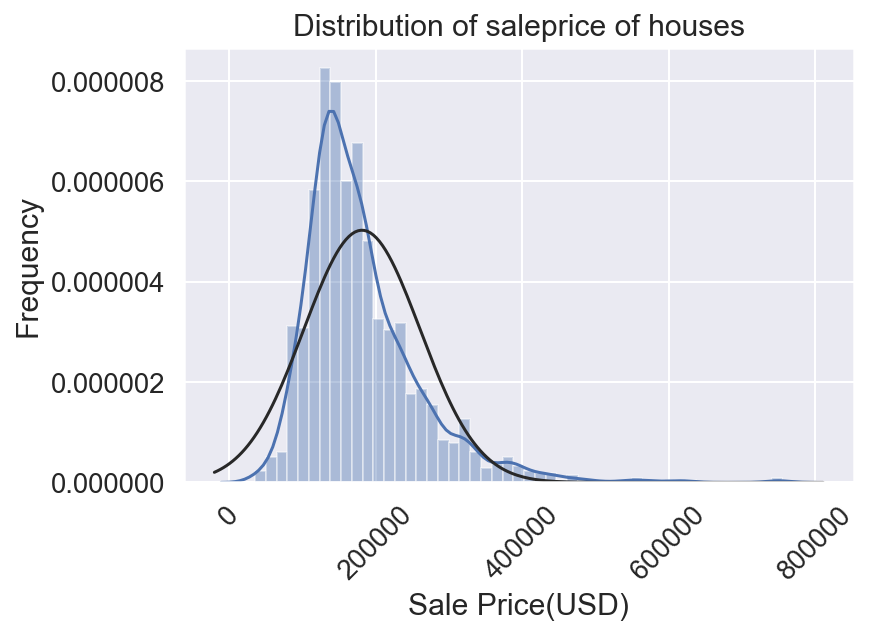

In [137]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Answer:** Sale Price is the reason of our quest. It deviates from normal distribution and positivly skewed and shows peakedness. The sale price distribution is right skewed and high kurtosis compared with normal distribution.
The measure of skewness and kurtosis is calculated as above. To convert this feature into normal distribution, we should apply log transformation.

# Bivariate Study

#### Realtionship with numerical variable

### Q. Is there any relation between total ground living area and the sale price of the house?

Text(0.5, 1.0, 'Price relationship with groung living area')

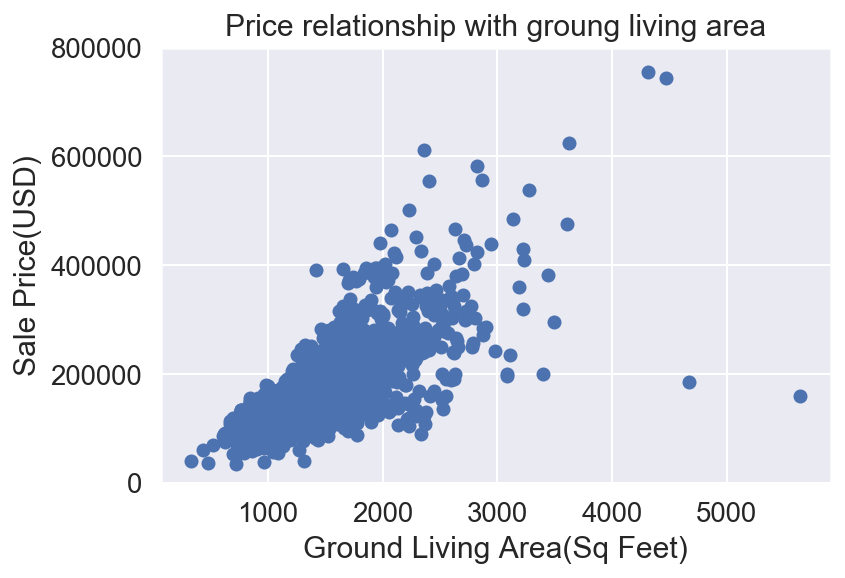

**Answer:** It seems that sale price and ground living area shows linear relationship.

### Q. How is sale price related with total basement area?

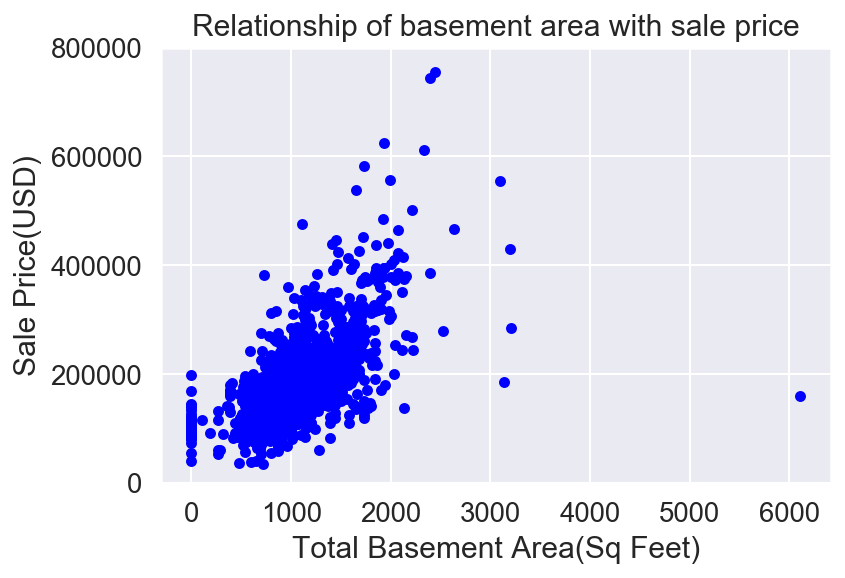

**Answer:** It seems total basement area also shows a linear realtionship with sale price. As compared to ground living area, total basement area has a stronger relation. There is outlier seen which should be justified later.

#### Relationship with categorical feature

### Q. Does overall quality of a house has an impact on its sale price?

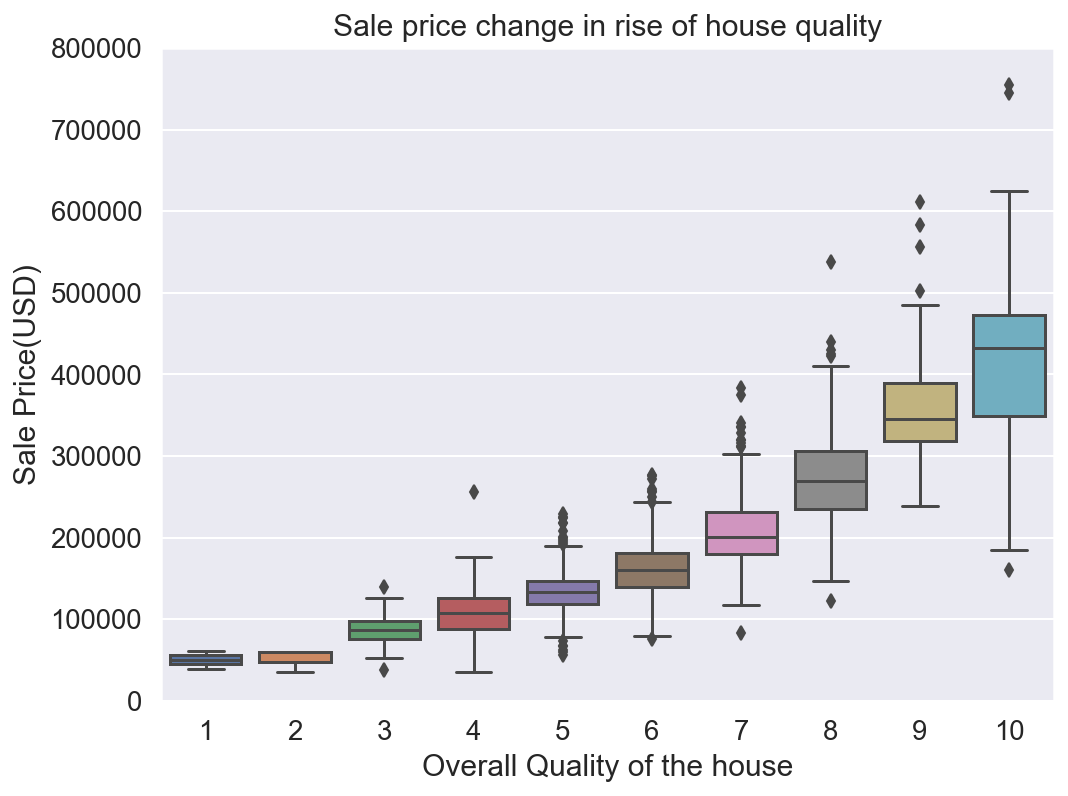

**Answer:** It can be understood from above boxplot that as there is increase in the quality of the house, the sale price also rises.

### Q. Does the year in which house was built has any impact on its sale price?

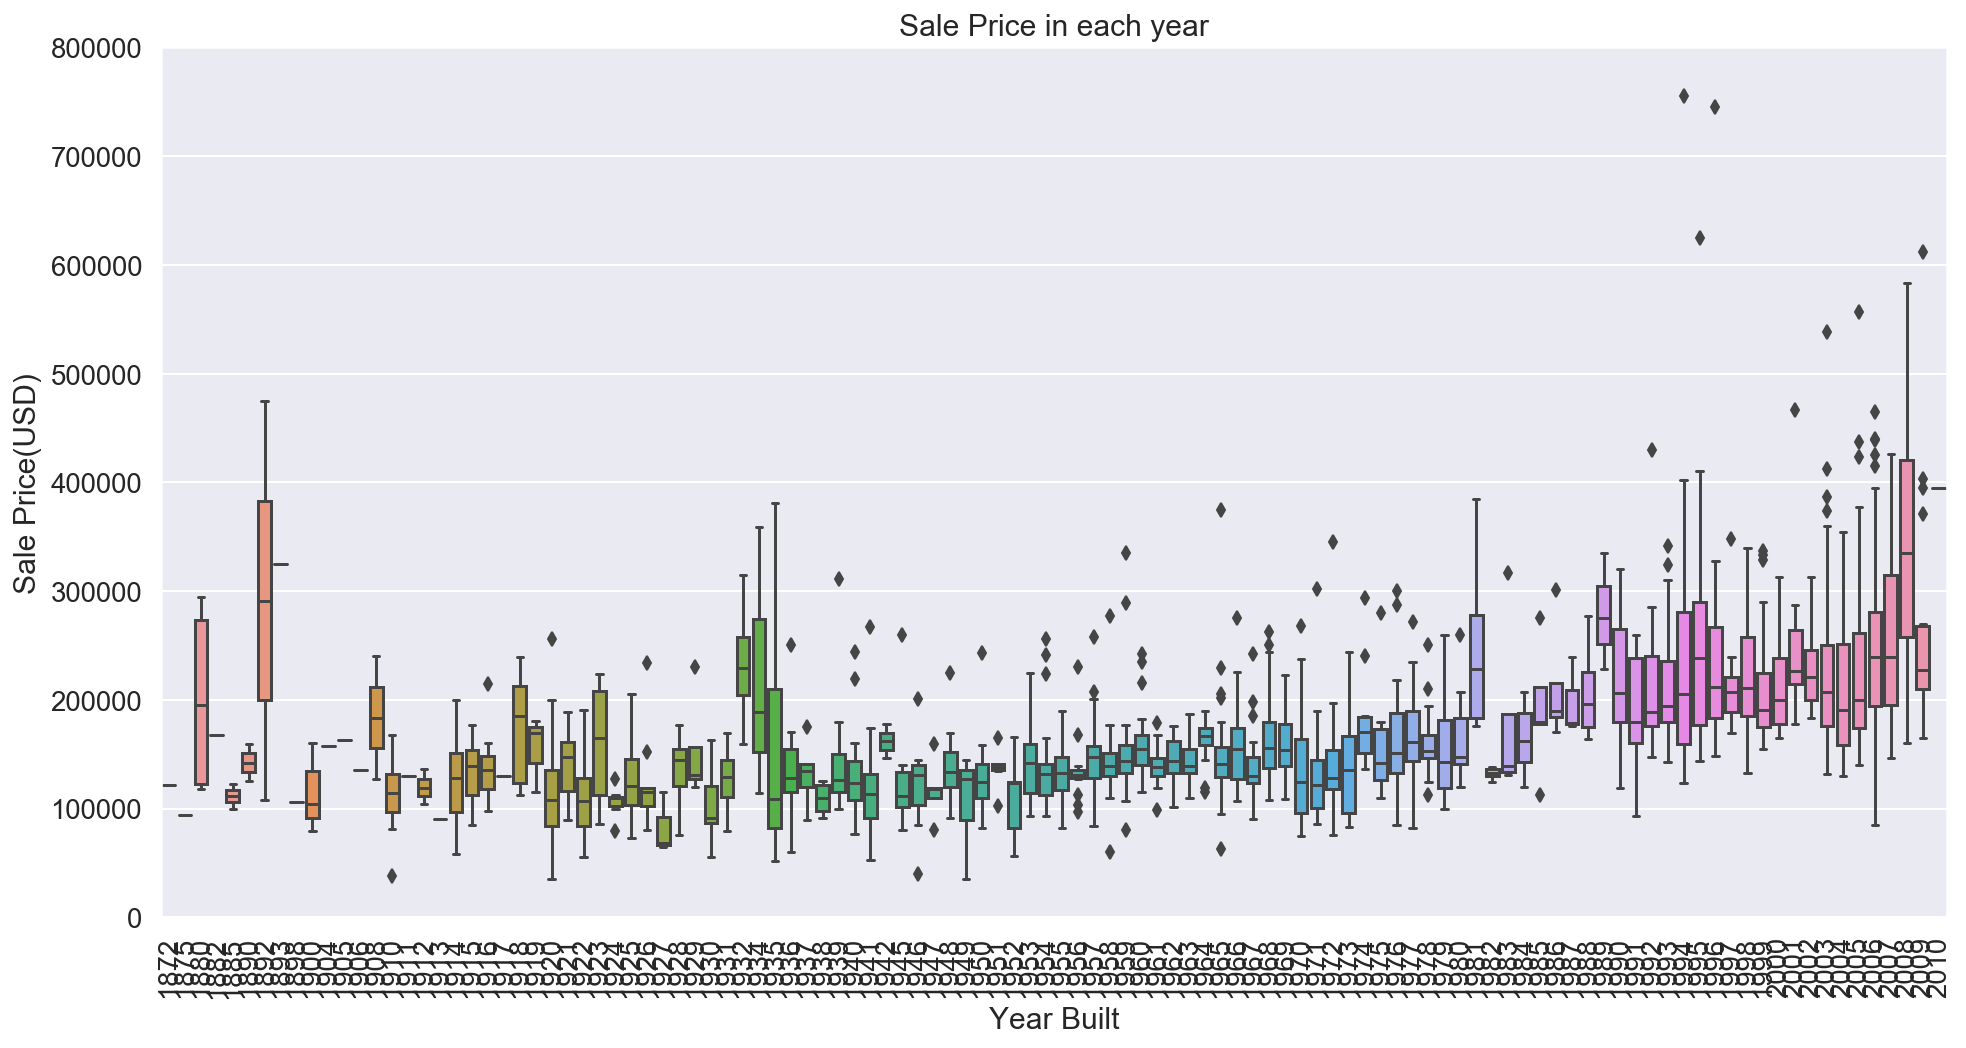

**Answer:** Clearly, it can be noticed that sale price is more prone to recently built houses than older ones.

# Multivariate Study

**Until now we used our intuition to figure out respisible features but now lets dive into the actual practise to see which variables are highly correlated.**

### Q. Can we figure out multicollinearity in the data?

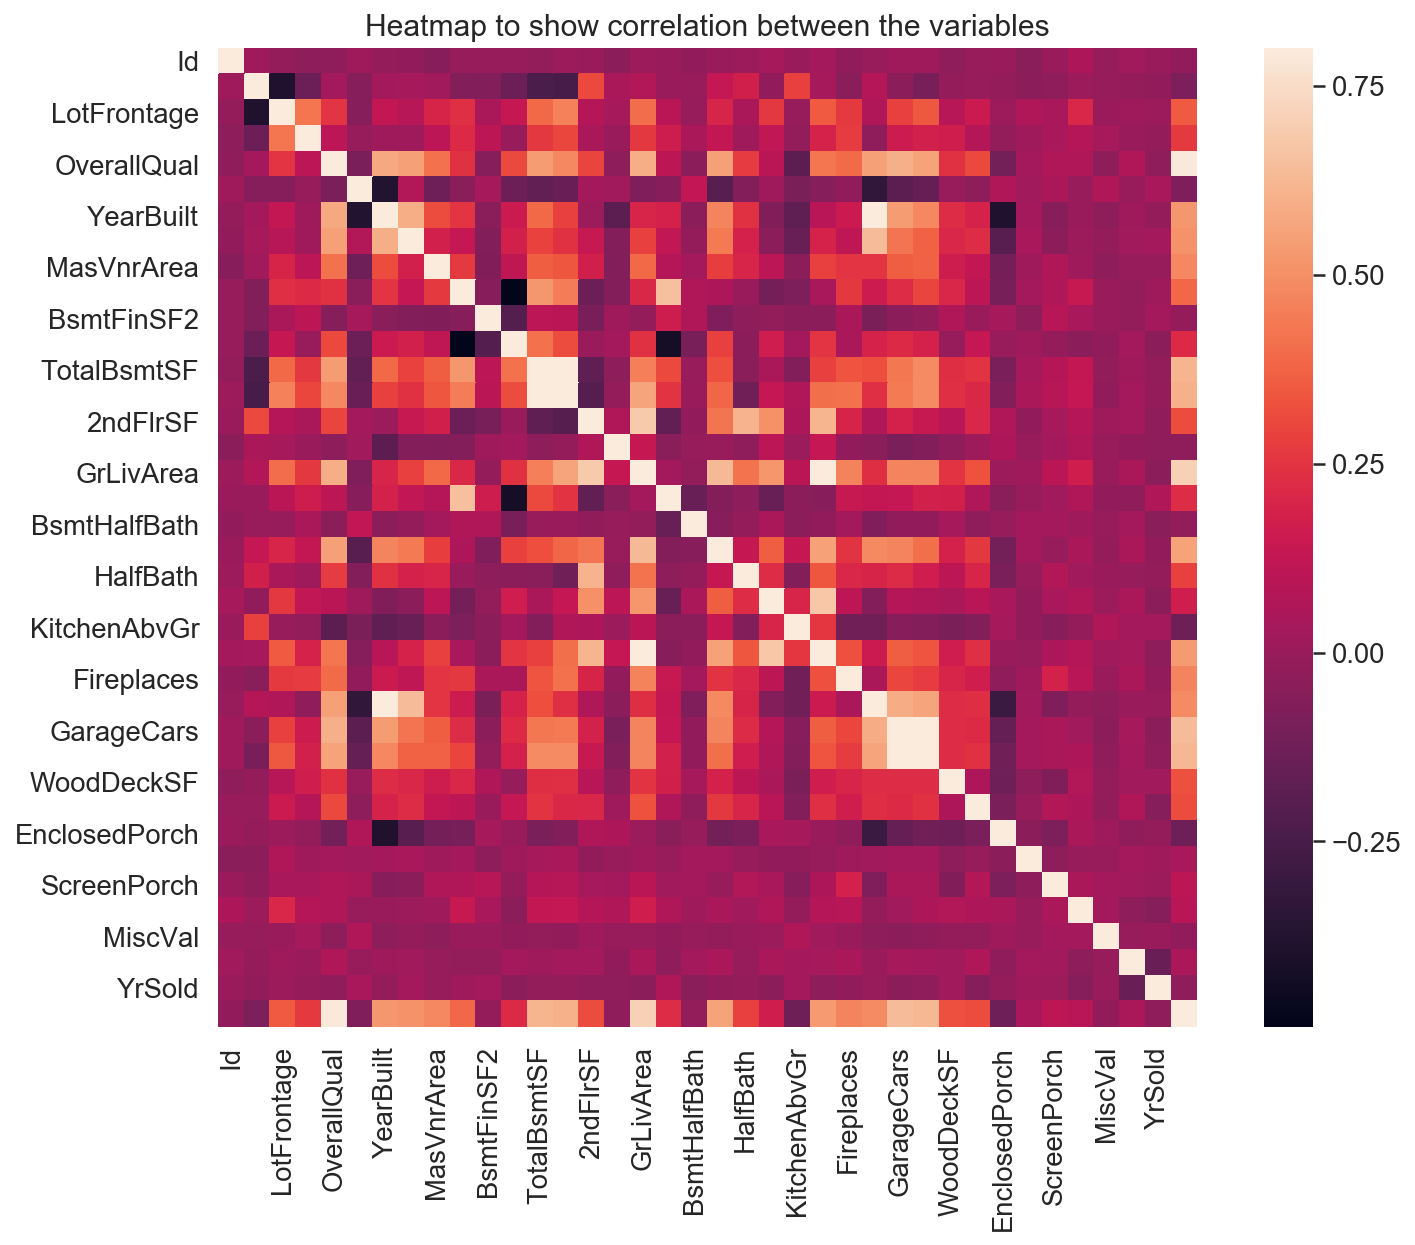

**Answer:** The above figure shows a heatmap with its colorbar stating the correlation between the variables. It can be seen whether a variable is highly, moderatly or not realted with the sale price and amongst each other.

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. 
Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' are highly correlated, but we can also see many other variables that should be taken into account. 

## Note:
Below shows a heatmap of the top 10 features which are correlated with sale proce in descending order to have a better understanding of the dataset features.

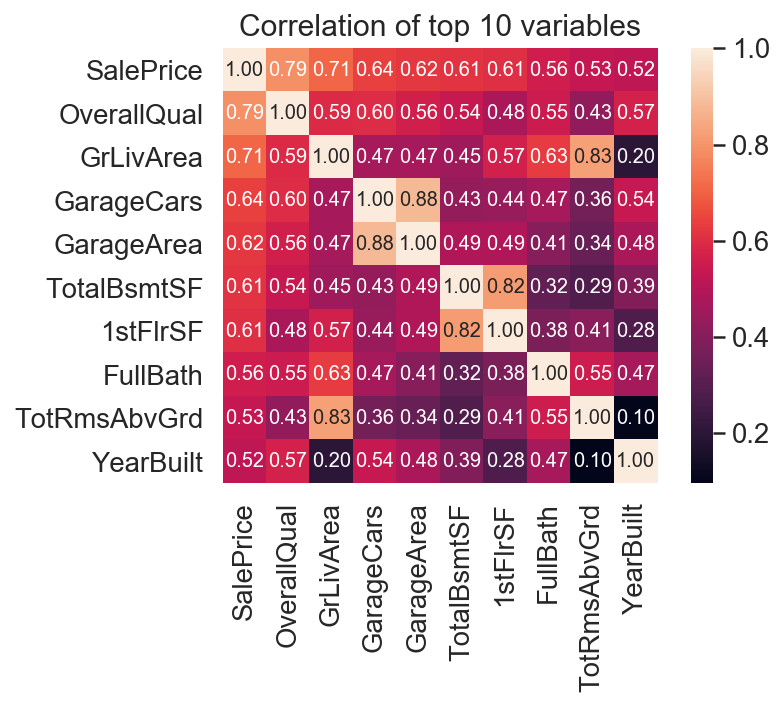

In [143]:
k =10
cols = df.corr().nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm,cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.title('Correlation of top 10 variables')
plt.show()

These are the variables most correlated with 'SalePrice'.
 - 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
 - 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area. Therefore, we can keep 'GarageCars' since its correlation with 'SalePrice' is higher.
 - 'TotalBsmtSF' and '1stFloor' also seem to be same. We keep 'TotalBsmtSF'.
 - 'TotRmsAbvGrd' and 'GrLivArea', same again.
 - 'YearBuilt'. It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.

### Q. Can you show realtionship between various variables?

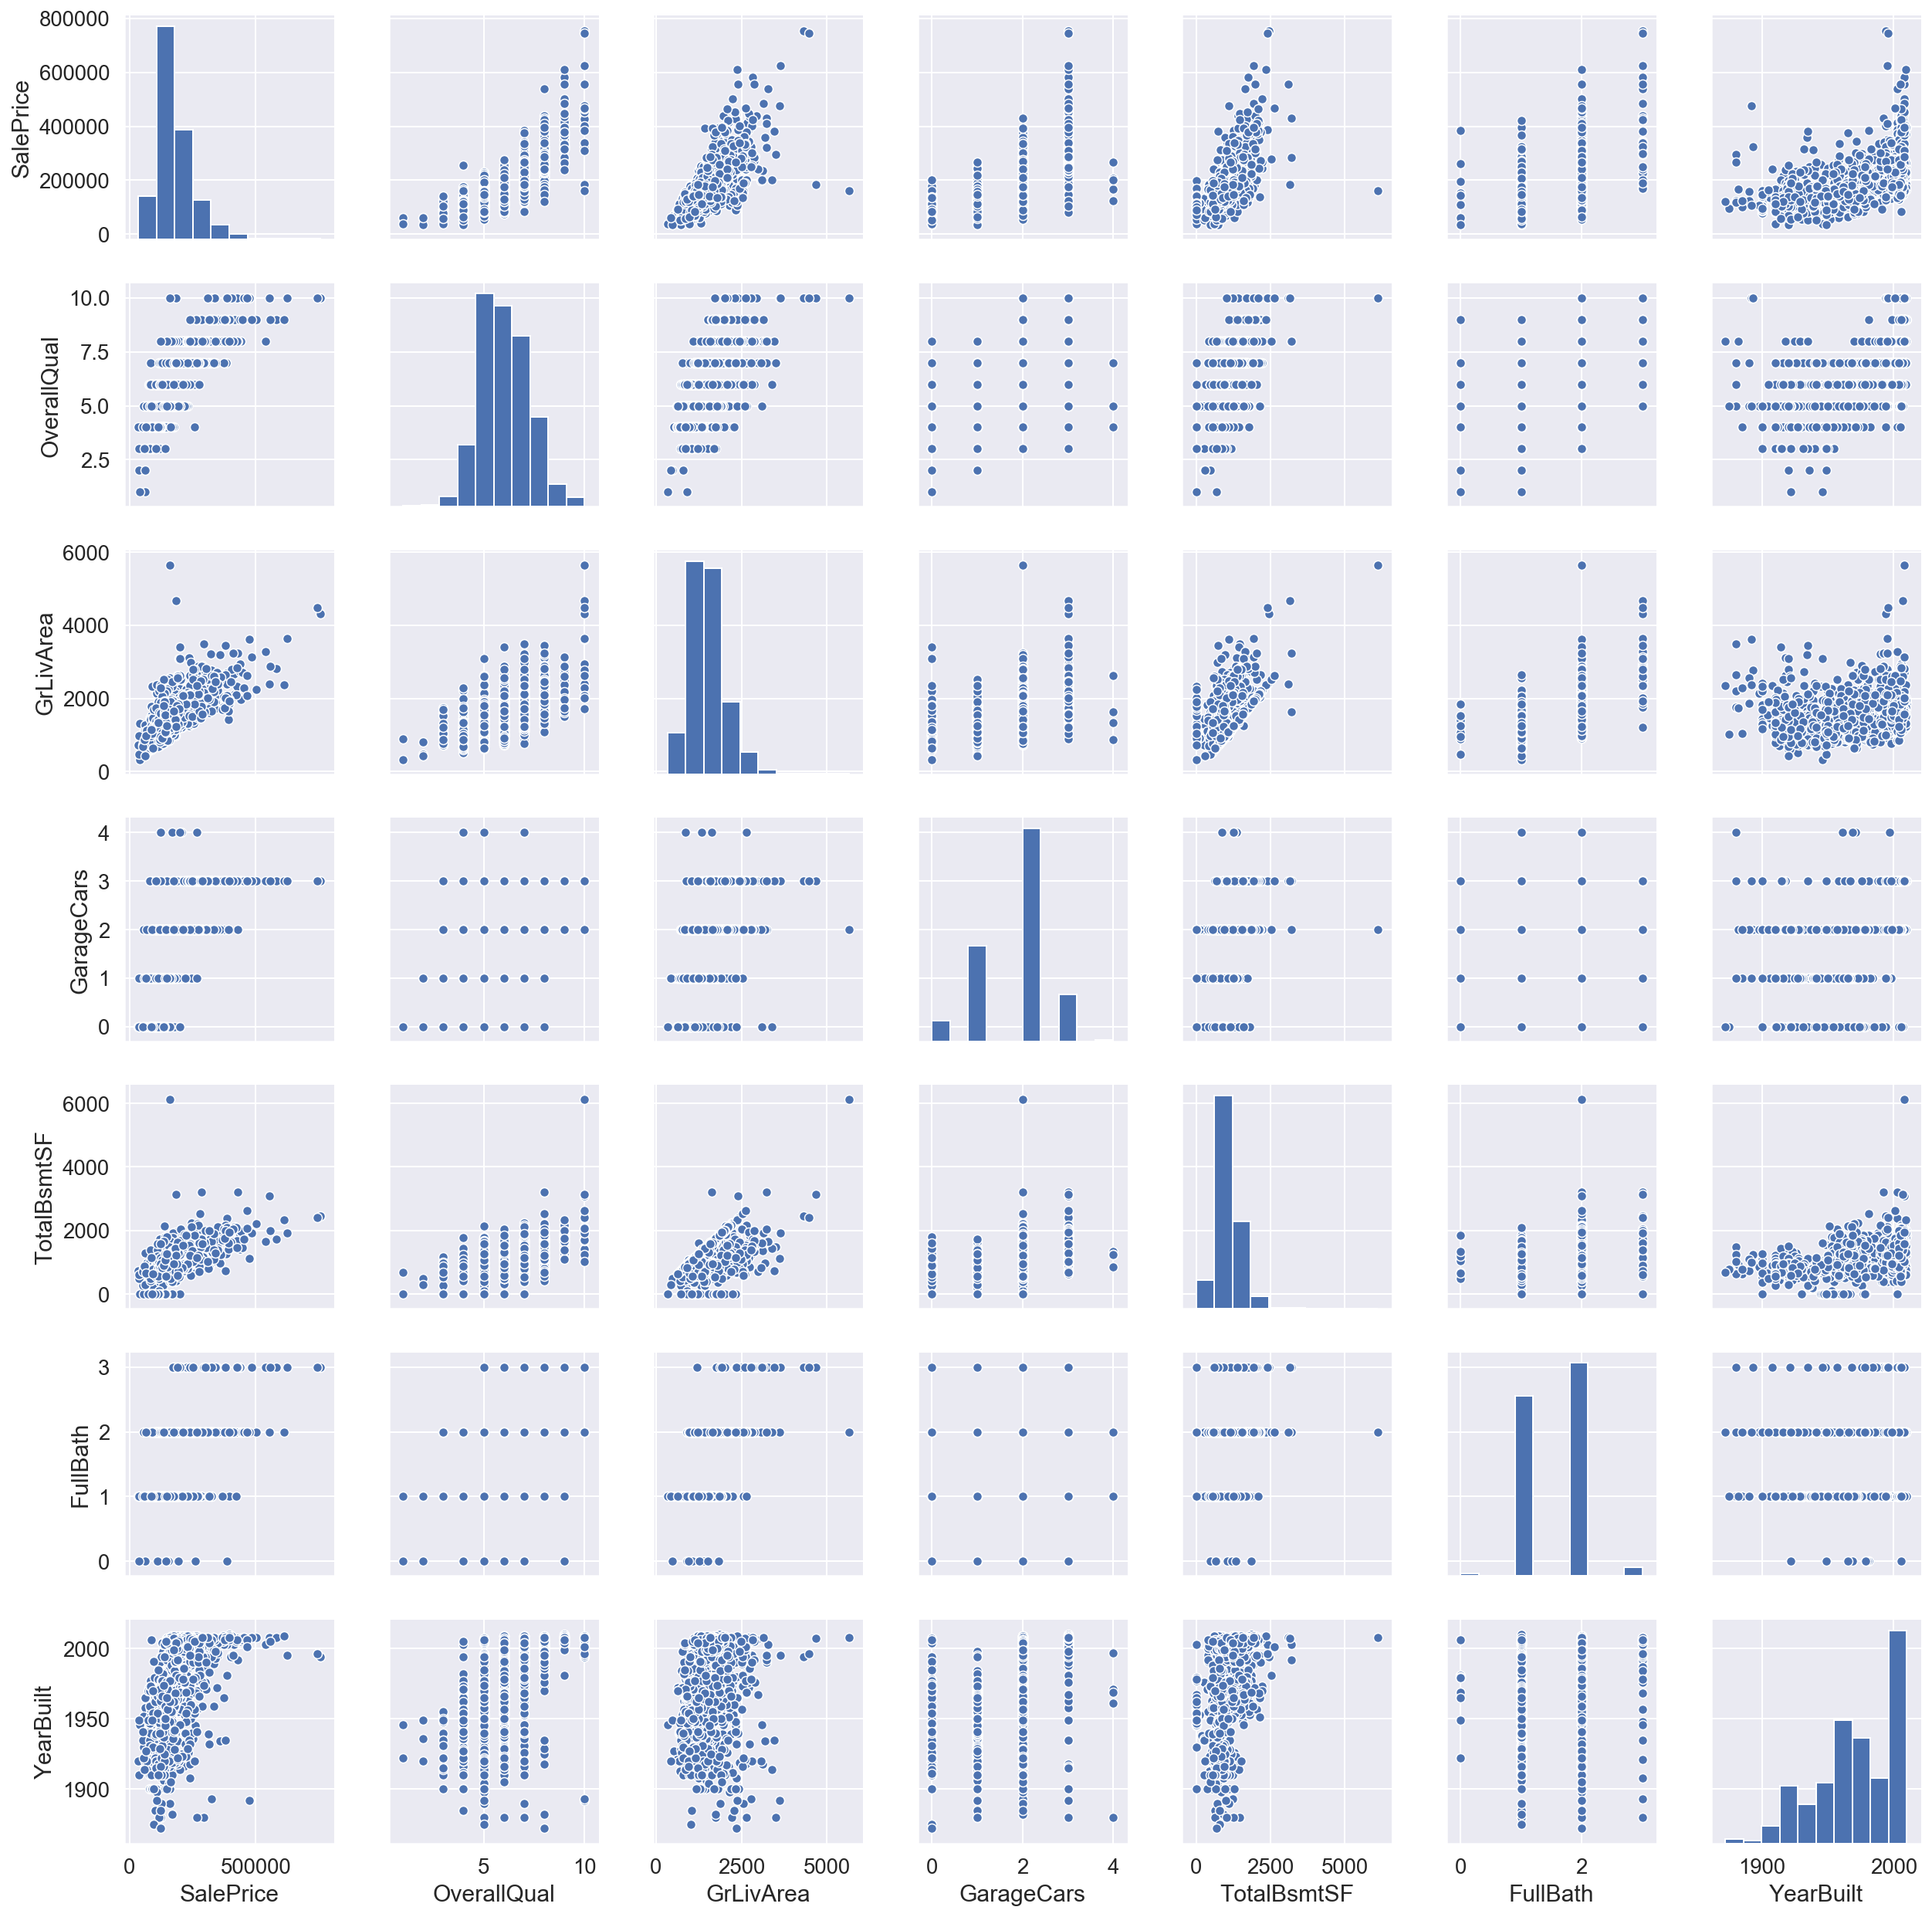

**Answer:** This mega scatter plot gives us a reasonable idea about variables relationships.
 - One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).
 - The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function. We can also see this same tendency in the upper limit of the 'dots cloud'. Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).


### Q. Are their outlier and how can they be handled?

**Answer:** It can be seem from the above data that their are outliers present and should be handled seperatly after standardizing the numerical data between 0 and 1.

# Missing Data

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

### Q. How prevalent is missing data?

In [145]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


**Answer:** The above dataframe shows the percentage of missing data in each feature. To handle these missing data we have to take relevant steps.

### Q. What are the steps taken to handle the missing data?

**Answer:**
 - We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. None of these variables seem to be very important
 - Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.
 - We have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.
 - Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.


In [146]:
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df.isnull().sum().max() 

1

### Q. How to convert a feature into normal distribution? What is the use of this method?

### Since sale price is not normal, we use log tranform to convert the feature into normal distribution.

In [147]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])

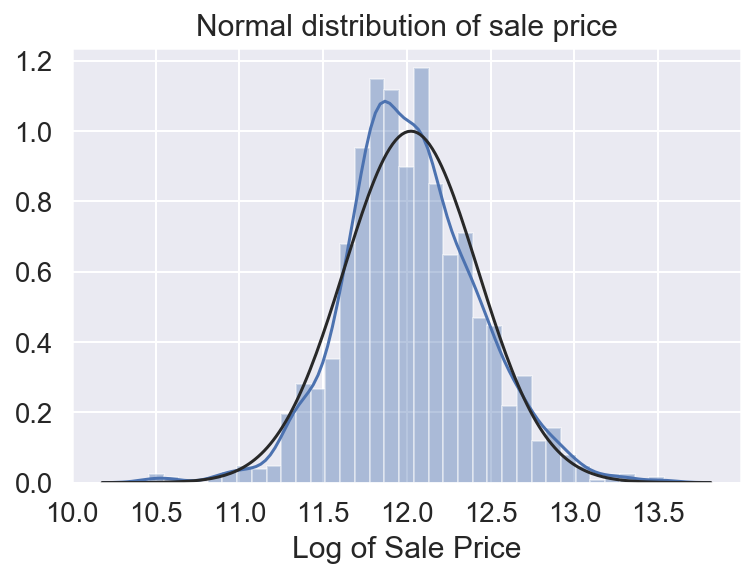

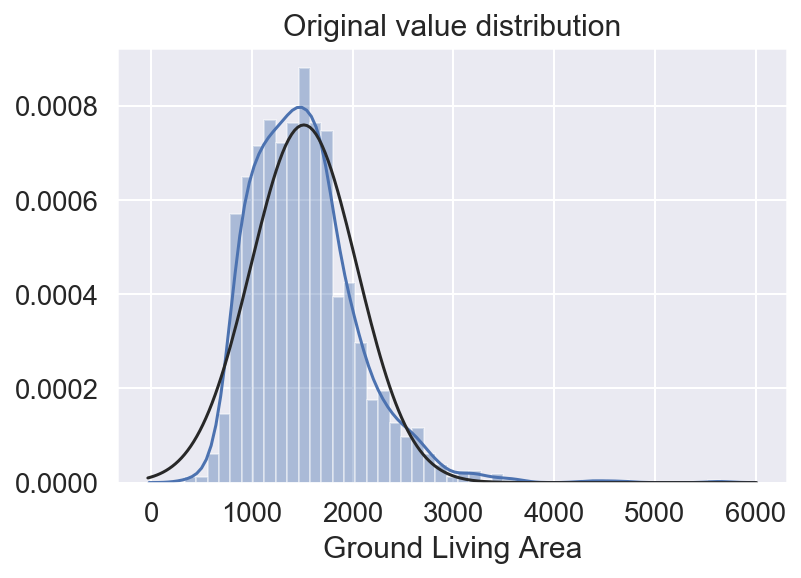

In [150]:
#data transformation
df['GrLivArea'] = np.log(df['GrLivArea'])

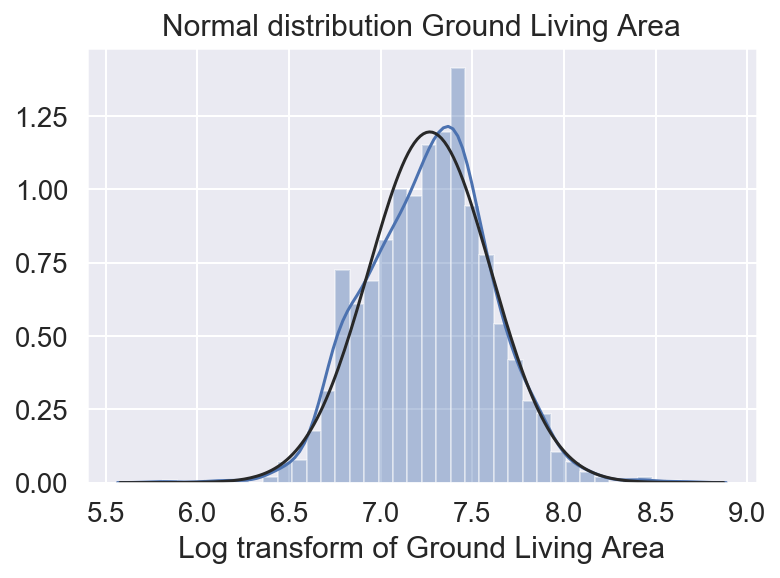

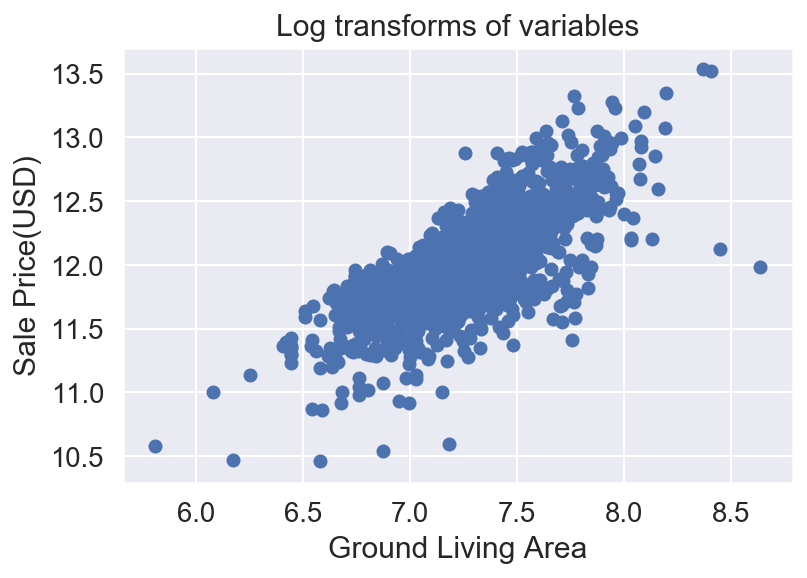

**Answer:** 

To convert a feature into normal distribution, we use different transformation method. One of those method is to convert the feature into natural log transform.

Older versions of this scatter plot (previous to log transformations), had a conic shape. As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality!

# Summary

We can conclude that:

'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

To handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

We used log transformation method to convert a variable into normal distribution and also by implementing this method we reduced the variace in data which can be seen in the last scatter plot between Ground Living Area and Sale Price.

In [4]:
!jupyter nbconvert exploration_template.ipynb --to slides --post serve

[NbConvertApp] Converting notebook exploration_template.ipynb to slides
[NbConvertApp] Writing 2388123 bytes to exploration_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/exploration_template.slides.html
Use Control-C to stop this server
^C

Interrupted
